In [17]:
import pandas as pd

# Loading Data

In [18]:
 data = pd.read_csv('/content/drive/MyDrive/DataSets/Credit-card-dataset/creditcard.csv', nrows=50000)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  int64  
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 22

In [20]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,28923.779620,-0.242344,0.010316,0.692829,0.185482,-0.258043,0.105202,-0.120580,0.053704,0.120198,-0.055252,0.369160,-0.339671,0.161303,0.166098,0.121642,-0.015185,0.115857,-0.094888,-0.028047,0.047351,-0.028909,-0.106878,-0.039899,0.008362,0.135912,0.020885,0.004915,0.004232,93.266587,0.002960
std,13116.563925,1.887731,1.629766,1.508700,1.400009,1.412611,1.311299,1.282493,1.223824,1.213120,1.144151,1.120637,1.337130,1.118854,1.126836,0.949892,0.952704,1.112001,0.873651,0.820747,0.724944,0.736011,0.637858,0.589736,0.594216,0.439013,0.501260,0.388101,0.334785,253.010040,0.054326
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,-18.271168,-4.049895,-17.769143,-3.844974,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-4.932733,-13.694584,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,21893.500000,-0.992599,-0.564348,0.216729,-0.721295,-0.867721,-0.635255,-0.606146,-0.146744,-0.614300,-0.531234,-0.441099,-0.943185,-0.586285,-0.298101,-0.438433,-0.499209,-0.358698,-0.570694,-0.524147,-0.165540,-0.231454,-0.529526,-0.178930,-0.321902,-0.127945,-0.330577,-0.063231,-0.006699,7.627500,0.000000
50%,33471.500000,-0.245008,0.078253,0.795902,0.191131,-0.289438,-0.150443,-0.077294,0.058736,0.010464,-0.111686,0.329752,-0.028150,0.105222,0.147779,0.236553,0.053847,0.065704,-0.077561,-0.032244,-0.022720,-0.068160,-0.082056,-0.051642,0.062302,0.175743,-0.071973,0.009035,0.022174,25.000000,0.000000
75%,38983.000000,1.155544,0.731591,1.430980,1.067868,0.283011,0.495431,0.423920,0.332187,0.815765,0.414875,1.164788,0.540147,0.873181,0.668349,0.799648,0.549112,0.539629,0.402120,0.480012,0.171828,0.108087,0.307440,0.078620,0.401568,0.422121,0.300405,0.083875,0.076303,85.250000,0.000000
max,44299.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,12.018913,4.846452,4.465413,7.692209,5.784514,6.098529,9.253526,4.295648,5.228342,26.237391,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [22]:
data["Class"].value_counts()

0    49852
1      148
Name: Class, dtype: int64

# Observations


1.   data is highly imbalanced 
2.   Time is not useful
3.   Amount column needs to be Normalised



In [23]:
X = data.drop(['Time','Class'],axis=1)
y= data['Class']

Sampling Techniques


*   Undersampling - Reducing Larger representative
*   Oversampling - Increasing smaller representative



In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=3,
                            n_clusters_per_class=1,
                            weights=[0.01, 0.05, 0.94],
                            class_sep=0.8, random_state=0)

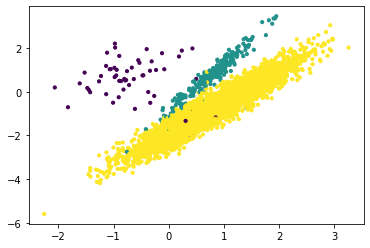

In [26]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [28]:

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


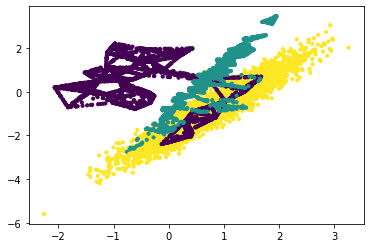

In [31]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10) # new data is added 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

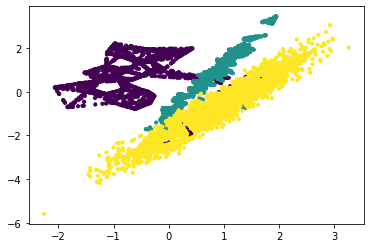

In [33]:
X_resampled ,y_resampled = SMOTEENN().fit_sample(X,y)
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

if the surrounding data is not under same cluster it will be removed
and generate more data 

## Choosing Estimator 


1.   SGDClassifier
2.   RandomForestClassifer
3.   SVC



In [34]:
from imblearn.pipeline import make_pipeline

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [36]:
models = [SGDClassifier(), RandomForestClassifier(),SVC()]
samplers= [SMOTE(),SMOTEENN()]


In [37]:
model_pipelines =[]
for model in models:
  for sampler in samplers:
    pipeline = make_pipeline(StandardScaler(), sampler , model)
    model_pipelines.append(pipeline)

In [42]:
pipline

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('smoteenn',
                 SMOTEENN(enn=None, random_state=None, ratio=None,
                          sampling_strategy='auto', smote=None)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
model_pipelines

In [40]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y =train_test_split(X,y)

In [41]:
for pipline in model_pipelines:
  pipeline.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni